# ML Pipeline

In [26]:
import pandas as pd

from fraud.config.config import PARAMS
from fraud.config.features import FEATURES

from fraud.steps.DataFetchStep import DataFetchStep
from fraud.steps.PreProcessStep import PreProcessStep

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (plot_confusion_matrix
                             , confusion_matrix
                             , classification_report)

In [2]:
data_fetch_step = DataFetchStep(FEATURES['numerical_columns']
                                , FEATURES['categorical_columns'])

In [3]:
df = data_fetch_step.fetch_data(PARAMS['input_data'])

In [19]:
preprocess_step = PreProcessStep(
    FEATURES['numerical_columns']
    , FEATURES['categorical_columns']
)

In [20]:
X = df[FEATURES['numerical_columns']+FEATURES['categorical_columns']]
y = df[FEATURES['label_column']]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [22]:
X_train = preprocess_step.fit_and_transform(X_train)

## Base sklearn

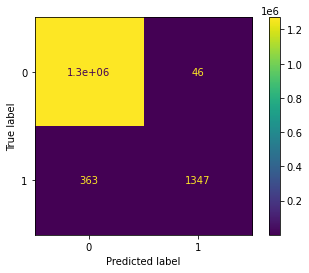

In [16]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

X_test = preprocess_step.transform(X_test)
y_pred = clf.predict(X_test)

plot_confusion_matrix(clf, X_test, y_test)

## imblearn

In [12]:
X.shape

(6362620, 6)

In [8]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

In [ ]:
resample_method = "random"

In [23]:
X_train_resampled, y_train_resampled = RandomOverSampler().fit_resample(X_train, y_train)

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train_resampled, y_train_resampled)

X_test = preprocess_step.transform(X_test)
# y_pred = clf.predict(X_test)

plot_confusion_matrix(clf, X_test, y_test)